<a href="https://colab.research.google.com/github/Imane0021/python_project/blob/main/python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of Student Performance Using Python

--Problematic:

As part of the IS407 course, we are using Python to analyze data.The dataset,Students Performance in Exams from Kaggel was suggested by our professor because it's simple and easy to manipulate.The main problematic we want to explore is: what factors have the biggest impact on students’ academic performance?

--Aim of the Project:

The purpose of this project is to apply the Python knowledge that We have learned on a real dataset. This project's goal is to find out all the factors that affect students’ academic performances. We will consider factors that affect "math, reading, and writing" scores such as gender, race/ethnicity, parental level of education, type of lunch, and even test preparation course. Then, using the Python programming language in Google Colab, we loaded the data, cleaned it, and explored its content. We also created visualizations to help investigate the relationships between these features and the outcomes of the students.



In [57]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
# 2. Load the Dataset
df = pd.read_csv('student_performance.csv')
df.head()



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,female,group B,associate's degree,standard,none,71,83,78
4,female,group B,some college,standard,completed,88,95,92


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [60]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [61]:
df.shape

(1000, 8)

In [62]:
# 3. Rename Columns
df.rename(columns={
    'math score': 'Math',
    'reading score': 'Reading',
    'writing score': 'Writing',
    'race/ethnicity': 'Ethnicity',
    'parental level of education': 'Parental_Edu',
    'test preparation course': 'Prep_Course'
}, inplace=True)

df.columns

Index(['gender', 'Ethnicity', 'Parental_Edu', 'lunch', 'Prep_Course', 'Math',
       'Reading', 'Writing'],
      dtype='object')

In [63]:
# 4. Check for Missing Values
df.isnull().sum()

,0
gender,0
Ethnicity,0
Parental_Edu,0
lunch,0
Prep_Course,0
Math,0
Reading,0
Writing,0


In [64]:
# 5. Convert Data Types
categorical_cols = ['gender', 'Ethnicity', 'Parental_Edu', 'lunch', 'Prep_Course']
for col in categorical_cols:
    df[col] = df[col].astype('category')

df.dtypes

,0
gender,category
Ethnicity,category
Parental_Edu,category
lunch,category
Prep_Course,category
Math,int64
Reading,int64
Writing,int64


In [65]:
#6. Remove Duplicates
print("Duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after:", df.duplicated().sum())

Duplicates before: 0
Duplicates after: 0


In [66]:
# 7.Quick Checks
print("Number of Students:", len(df))

print("Number of Students by Gender:")
print(df['gender'].value_counts())

print("Number of Students by Ethnicity:")
print(df['Ethnicity'].value_counts())

print("Number of Students by Parental Education:")
print(df['Parental_Edu'].value_counts())

print("Number of Students by Lunch:")
print(df['lunch'].value_counts())

print("Number of Students by Test Preparation Course:")
print(df['Prep_Course'].value_counts())
print()

Number of Students: 1000
Number of Students by Gender:
gender
female    518
male      482
Name: count, dtype: int64
Number of Students by Ethnicity:
Ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
Number of Students by Parental Education:
Parental_Edu
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
Number of Students by Lunch:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
Number of Students by Test Preparation Course:
Prep_Course
none         642
completed    358
Name: count, dtype: int64



In [67]:
#demographic features (gender, race/ethnicity, parental education, lunch type, test prep course)
#three performance variables: math score, reading score, and writing score

In [68]:
def show_average(column):
    print(f"\nAverage math score for each group in {column}:")
    avg = df.groupby(column)["Math"].mean()
    print(avg)
    print("-" * 40)

In [69]:
show_average("gender")


Average math score for each group in gender:
gender
female    63.633205
male      68.728216
Name: Math, dtype: float64
----------------------------------------


/tmp/ipython-input-3183264940.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg = df.groupby(column)["Math"].mean()


In [70]:
def best_group(column):
    avg = df.groupby(column)["Math"].mean()
    top = avg.idxmax()
    score = avg.max()
    print(f"The best group in {column} is '{top}' with an average score of {score:.2f}")
    print("-" * 40)
    return top, score

In [71]:
best_group("Ethnicity")

The best group in Ethnicity is 'group E' with an average score of 73.82
----------------------------------------


/tmp/ipython-input-688567368.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg = df.groupby(column)["Math"].mean()


('group E', 73.82142857142857)

In [72]:
best_group("lunch")

The best group in lunch is 'standard' with an average score of 70.03
----------------------------------------


/tmp/ipython-input-688567368.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg = df.groupby(column)["Math"].mean()


('standard', 70.03410852713178)

In [73]:

def summary():
    print("\n--- SUMMARY ---")
    print("Students who did the test prep course got better scores.")
    print("Having parents with higher education helps in math.")
    print("Standard lunch students got higher scores than free/reduced lunch students.")
    print("Gender and race differences exist but are not very big.")
    print("-" * 40)


In [74]:
summary()



--- SUMMARY ---
Students who did the test prep course got better scores.
Having parents with higher education helps in math.
Standard lunch students got higher scores than free/reduced lunch students.
Gender and race differences exist but are not very big.
----------------------------------------


In [77]:
def show_examples_loc_iloc():
    print("\nExamples of loc and iloc usage:")

    # Using .loc to get all rows where gender is female
    girls = df.loc[df["gender"] == "female"]
    print(f"There are {len(girls)} female students.")

    # Using .iloc to get the first 3 rows and first 3 columns
    print("\nFirst 3 rows and first 3 columns using iloc:")
    print(df.iloc[:3, :3])

    # Using loc to see one specific student info
    print("\nDetails of the first student using loc:")
    print(df.loc[0])  # 0 = first row
    print("-" * 40)

show_examples_loc_iloc()


Examples of loc and iloc usage:
There are 518 female students.

First 3 rows and first 3 columns using iloc:
   gender Ethnicity       Parental_Edu
0  female   group B  bachelor's degree
1  female   group C       some college
2  female   group B    master's degree

Details of the first student using loc:
gender                     female
Ethnicity                 group B
Parental_Edu    bachelor's degree
lunch                    standard
Prep_Course                  none
Math                           72
Reading                        72
Writing                        74
Name: 0, dtype: object
----------------------------------------


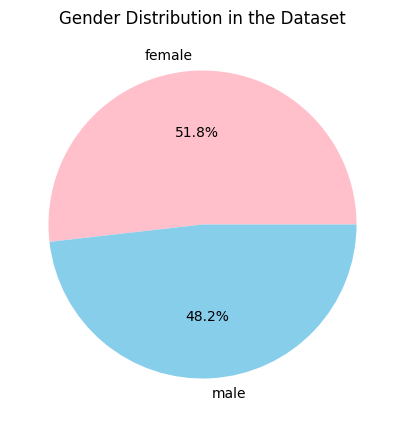

In [80]:
# Count how many students by gender
gender_counts = df["gender"].value_counts()

# Create pie chart
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=["pink", "skyblue"])
plt.title("Gender Distribution in the Dataset")
plt.show()


/tmp/ipython-input-3187179663.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_math_gender = df.groupby("gender")["Math"].mean()


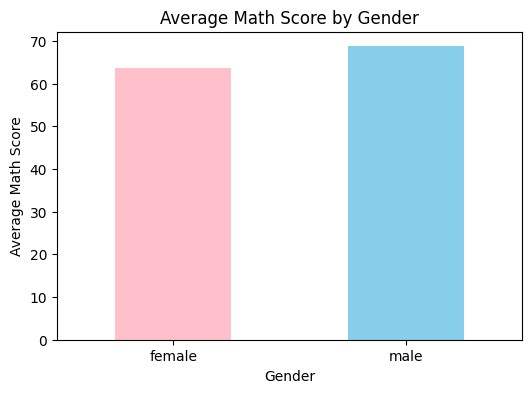

In [81]:
avg_math_gender = df.groupby("gender")["Math"].mean()

plt.figure(figsize=(6,4))
avg_math_gender.plot(kind="bar", color=["pink", "skyblue"])
plt.title("Average Math Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Math Score")
plt.xticks(rotation=0)
plt.show()


/tmp/ipython-input-3724341948.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_math_prep = df.groupby("Prep_Course")["Math"].mean()


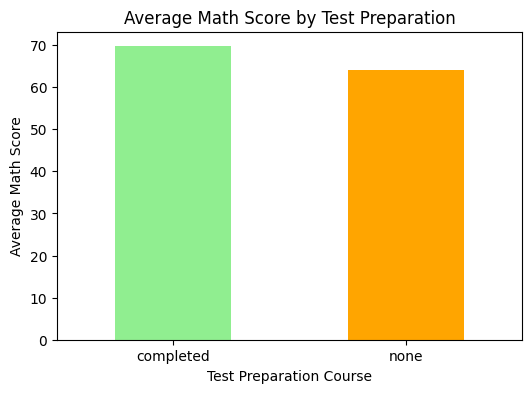

In [82]:
avg_math_prep = df.groupby("Prep_Course")["Math"].mean()

plt.figure(figsize=(6,4))
avg_math_prep.plot(kind="bar", color=["lightgreen", "orange"])
plt.title("Average Math Score by Test Preparation")
plt.xlabel("Test Preparation Course")
plt.ylabel("Average Math Score")
plt.xticks(rotation=0)
plt.show()


## Conclusion

After analyzing the data visually, we found that some factors really make a difference.  
The pie chart showed that our dataset is balanced between male and female students.  
Students who completed the test preparation course had better Math scores on average, proving that preparation helps improve performance.  
We also noticed that Math scores between genders were quite similar, showing that gender doesn’t have a big effect on performance in this dataset.

Overall, this project helped us understand how study preparation and personal effort can influence student results, and how visualizations make these patterns easier to see.
